In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [10]:

clf = DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [12]:

accuracy_score(y_test,y_pred)

0.6293706293706294

In [13]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6303208137715179

In [14]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [15]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [16]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [17]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [18]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [21]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [22]:
output.sample(5)

,age,age_trf,fare,fare_trf
349,42.0,12.0,8.6625,4.0
269,35.0,10.0,135.6333,14.0
352,15.0,1.0,7.2292,0.0
195,58.0,14.0,146.5208,14.0
787,8.0,1.0,29.1250,10.0


In [23]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())



In [24]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
777,5.0,0.0,12.475,5.0,"(0.42, 6.0]","(10.5, 13.0]"
666,25.0,6.0,13.000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
717,27.0,6.0,10.500,5.0,"(25.0, 28.0]","(8.158, 10.5]"
382,32.0,9.0,7.925,3.0,"(30.0, 32.0]","(7.896, 8.158]"
595,36.0,10.0,24.150,8.0,"(35.0, 38.0]","(18.75, 26.0]"


In [25]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [26]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [27]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6289319248826291

In [28]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6317097026604068


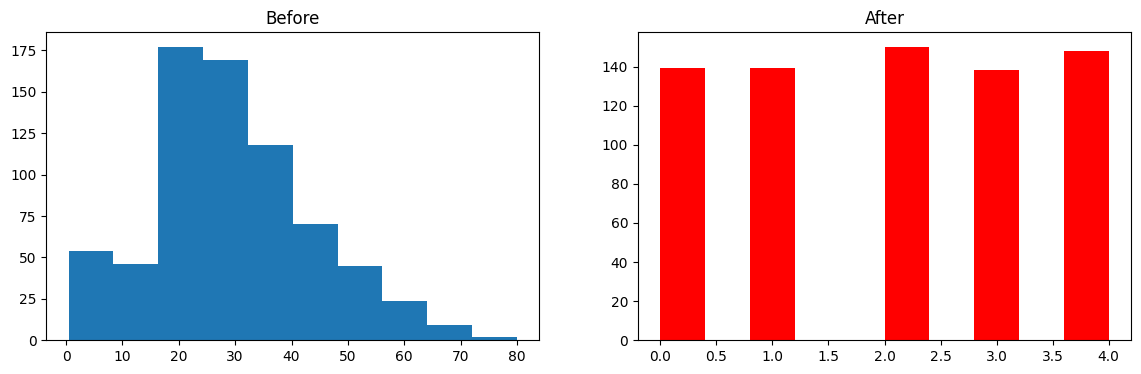

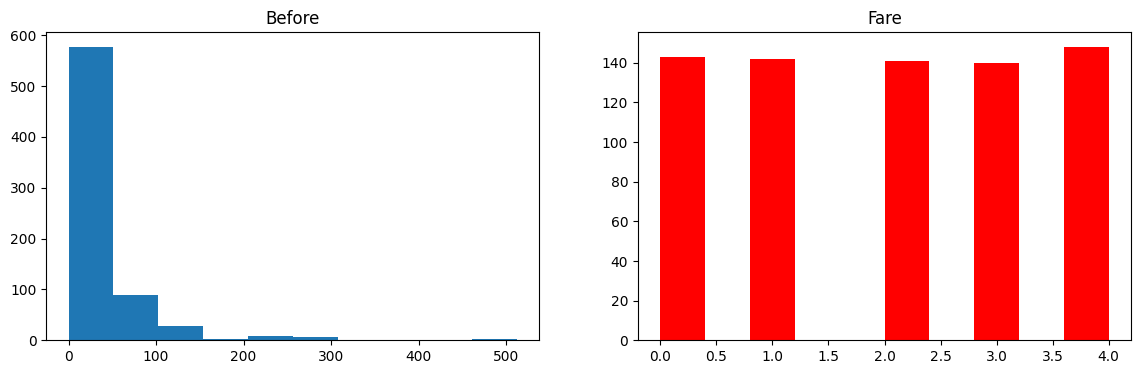

In [30]:
discretize(5,'quantile')